# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

--- 

Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;

## Inicialización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


## EDA

--- ANÁLISIS DEL TAMAÑO DEL CONJUNTO DE DATOS ---
El conjunto de datos tiene 7591 imágenes.

Primeras 5 filas de datos:
    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17

--- ANÁLISIS DE LA DISTRIBUCIÓN DE EDADES ---
Estadísticas descriptivas para la edad:
count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

Se ha guardado el histograma como 'age_distribution_plot.png'

--- MOSTRANDO MUESTRA DE IMÁGENES ---
Se ha guardado una muestra de imágenes como 'image_samples.png'


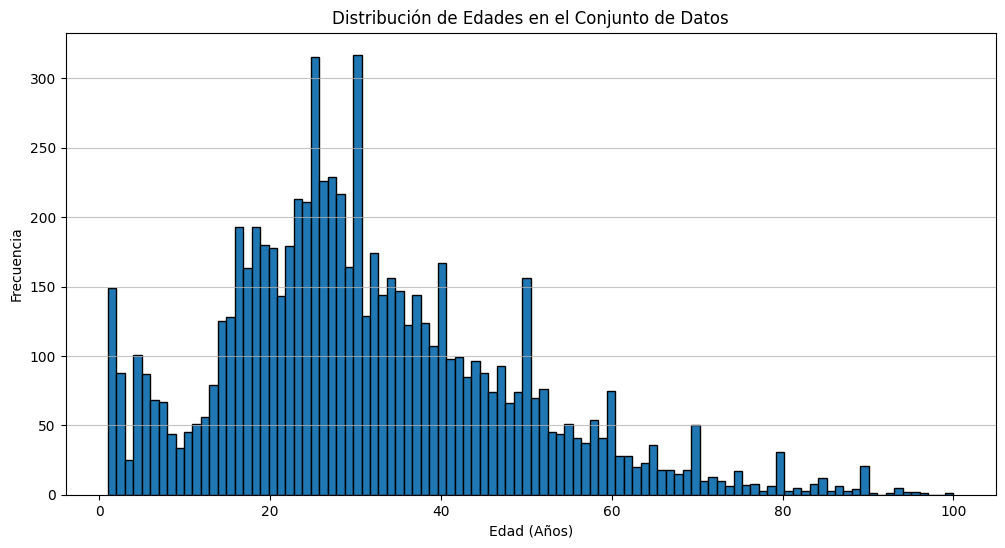

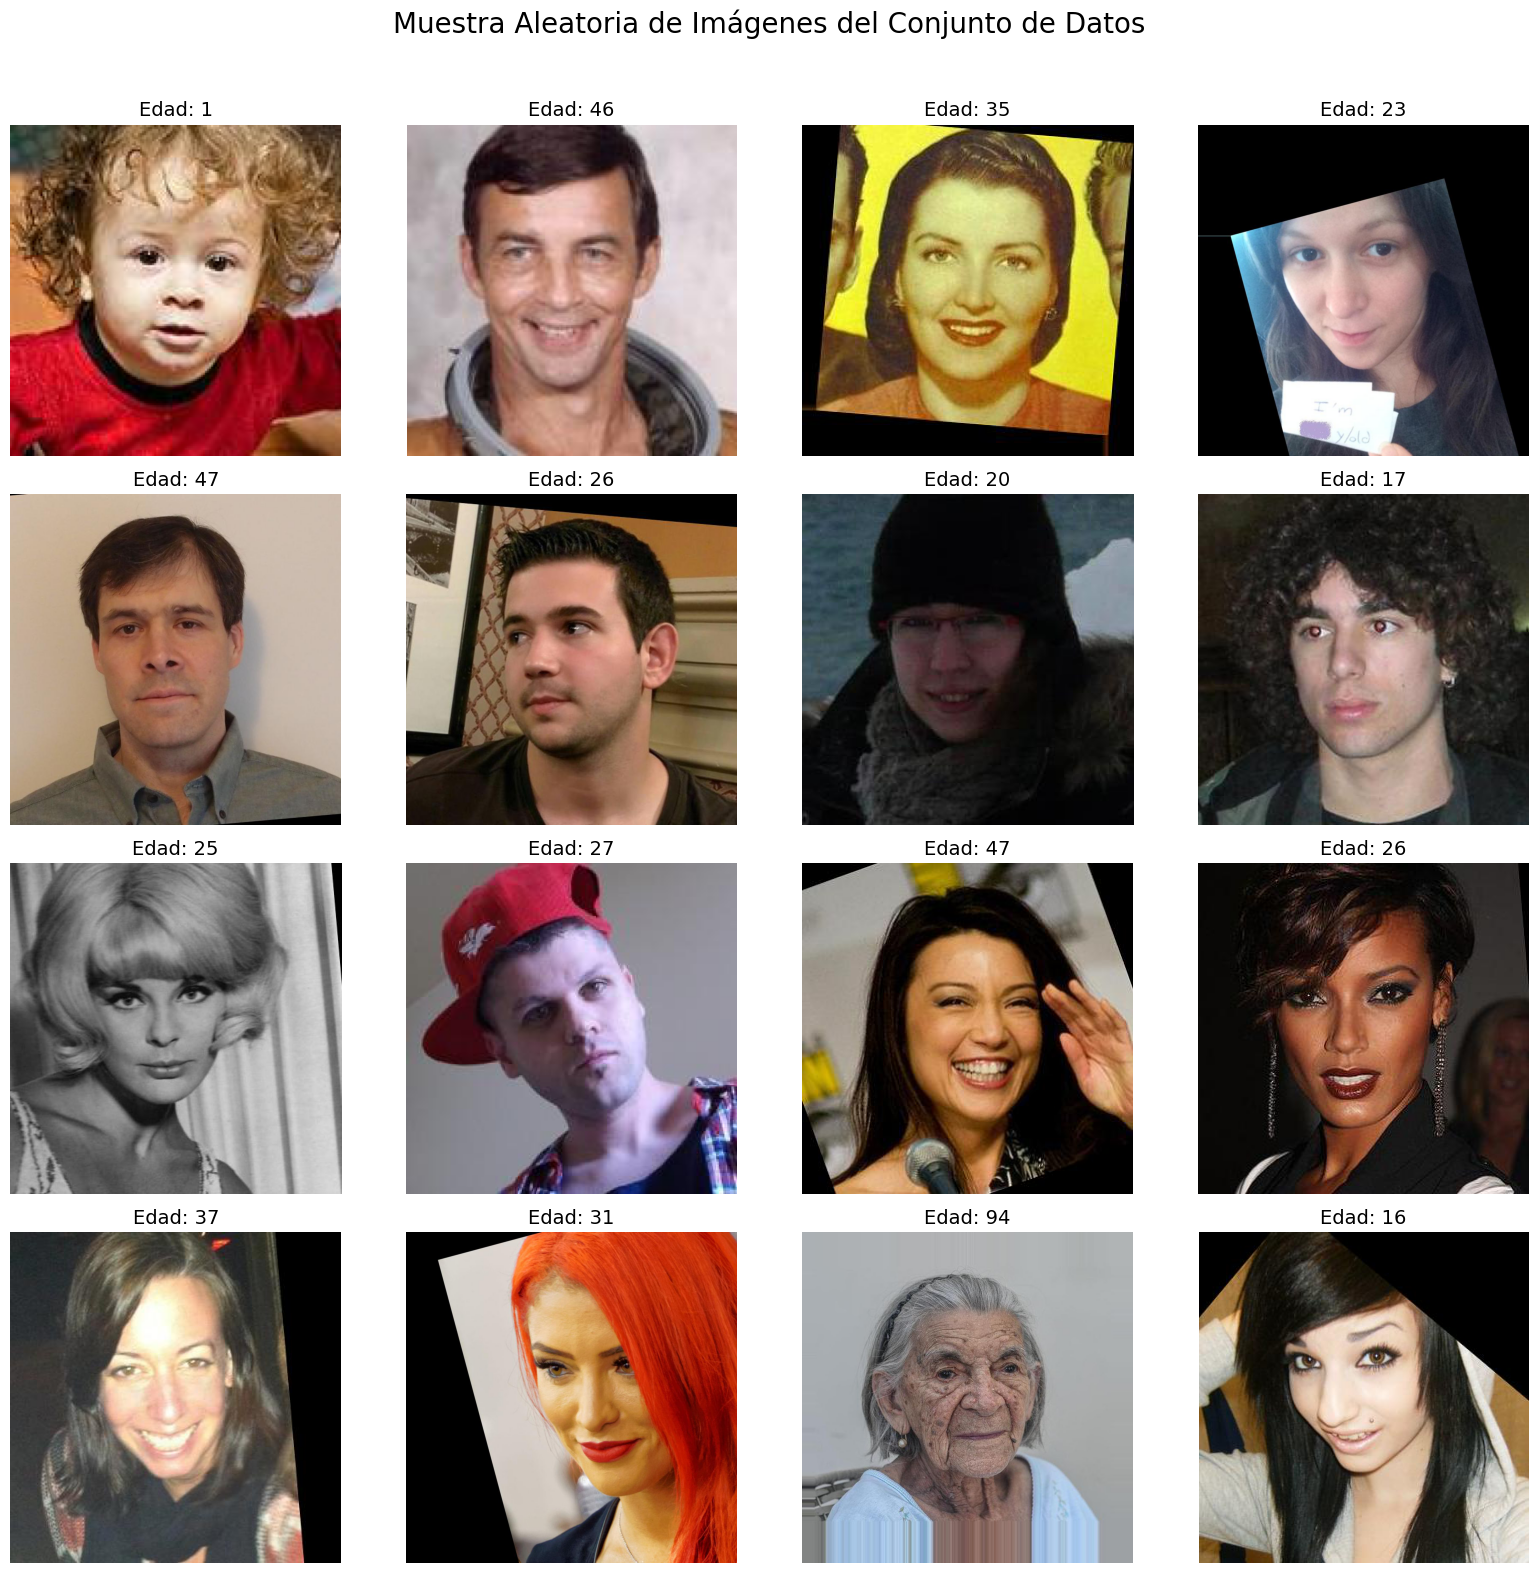

In [3]:
# --- 1. Cargar los Datos y Analizar el Tamaño ---

# Rutas a los archivos
labels_path = '/datasets/faces/labels.csv'
images_dir = '/datasets/faces/final_files/'

# Cargar el archivo de etiquetas
labels = pd.read_csv(labels_path)

print("--- ANÁLISIS DEL TAMAÑO DEL CONJUNTO DE DATOS ---")
print(f"El conjunto de datos tiene {labels.shape[0]} imágenes.")
print("\nPrimeras 5 filas de datos:")
print(labels.head())

# --- 2. Analizar la Distribución de Edades ---

print("\n--- ANÁLISIS DE LA DISTRIBUCIÓN DE EDADES ---")
print("Estadísticas descriptivas para la edad:")
print(labels['real_age'].describe())

# Crear y guardar el histograma
plt.figure(figsize=(12, 6))
plt.hist(labels['real_age'], bins=100, edgecolor='black')
plt.title('Distribución de Edades en el Conjunto de Datos')
plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.savefig('age_distribution_plot.png')
print("\nSe ha guardado el histograma como 'age_distribution_plot.png'")


# --- 3. Inspección Visual de Imágenes ---

print("\n--- MOSTRANDO MUESTRA DE IMÁGENES ---")
# Tomar una muestra aleatoria de 16 imágenes
sample_df = labels.sample(16, random_state=42)

fig = plt.figure(figsize=(16, 16))
fig.suptitle('Muestra Aleatoria de Imágenes del Conjunto de Datos', fontsize=20)

for i, (index, row) in enumerate(sample_df.iterrows()):
    ax = fig.add_subplot(4, 4, i + 1)
        
    # Construir la ruta completa a la imagen
    img_path = os.path.join(images_dir, row['file_name'])
        
    try:
        # Cargar y mostrar la imagen
        image = Image.open(img_path)
        ax.imshow(image)
        ax.set_title(f"Edad: {row['real_age']}", fontsize=14)
        ax.axis('off')
    except FileNotFoundError:
        ax.set_title(f"IMAGEN NO ENCONTRADA\n{row['file_name']}", fontsize=8)
        ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('image_samples.png')
print("Se ha guardado una muestra de imágenes como 'image_samples.png'")

### Conclusiones

Conclusiones del Análisis Exploratorio

El análisis revela que contamos con un conjunto de 7,591 imágenes, un volumen adecuado para entrenar un modelo de visión artificial mediante aprendizaje por transferencia. La calidad y diversidad de las imágenes reflejan condiciones del mundo real, incluyendo fotos rotadas, en blanco y negro, con distintos ángulos faciales y variaciones de iluminación.

La distribución de edades, aunque abarca un rango de 1 a 100 años, presenta un fuerte sesgo hacia individuos de entre 16 y 40 años. Los grupos de niños y, especialmente, de personas mayores están subrepresentados. Este desbalance probablemente hará que el modelo sea más preciso al predecir las edades del grupo mayoritario y menos fiable para las edades con menos datos.

Dadas estas observaciones, la estrategia de modelado debe considerar dos puntos clave: la gestión del sesgo en los datos y la necesidad de que el modelo sea robusto ante la variabilidad de las imágenes. Por lo tanto, será indispensable implementar una estrategia de aumento de datos (data augmentation) para exponer al modelo a diferentes condiciones y mejorar su capacidad de generalización.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [4]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [5]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    # coloca tu código aquí
    # Cargar el archivo de etiquetas
    labels = pd.read_csv(path + 'labels.csv')
    
    # Crear un generador de imágenes con aumento de datos
    train_datagen = ImageDataGenerator(
        rescale=1./255,              # Normalización de píxeles
        horizontal_flip=True,        # Volteo horizontal aleatorio
        rotation_range=10,           # Rotación aleatoria de hasta 10 grados
        width_shift_range=0.1,       # Desplazamiento horizontal aleatorio
        height_shift_range=0.1,      # Desplazamiento vertical aleatorio
        zoom_range=0.1               # Zoom aleatorio
    )
    
    # Crear el flujo de datos desde el dataframe
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',           # Modo 'raw' para regresión
        seed=12345
    )
    


    return train_gen_flow

In [6]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    # coloca tu código aquí
    # Cargar el archivo de etiquetas
    labels = pd.read_csv(path + 'labels.csv')
    
    # Crear un generador de imágenes solo con normalización
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    # Crear el flujo de datos desde el dataframe
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
    )
    

    return test_gen_flow

In [7]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    # coloca tu código aquí
    # Instanciar el modelo base ResNet50 con pesos de ImageNet
    backbone = ResNet50(
        input_shape=input_shape,
        weights='imagenet', 
        include_top=False  # No incluir la capa de clasificación original
    )
    
    # Definir el modelo secuencial
    model = Sequential()
    
    # Añadir el modelo base
    model.add(backbone)
    
    # Añadir capas personalizadas para la regresión de edad
    model.add(GlobalAveragePooling2D())  # Reduce la dimensionalidad de los features
    model.add(Dense(1, activation='relu')) # Capa de salida con 1 neurona para la edad
    
    # Definir el optimizador
    optimizer = Adam(learning_rate=0.0001)
    
    # Compilar el modelo
    model.compile(
        optimizer=optimizer, 
        loss='mean_absolute_error',  # Métrica de pérdida ideal para regresión de edad
        metrics=['mae']              # Métrica de seguimiento (Mean Absolute Error)
    )
    

    return model

In [8]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    # # coloca tu código aquí
     # Si no se especifican los 'steps', se calculan a partir del tamaño de los datos
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    # Entrenar el modelo
    model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2  # Muestra una línea de información por época
    )
    

    return model

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [ ]:
# -----------------------------------------------------------------
# SCRIPT COMPLETO PARA EJECUTAR EN LA PLATAFORMA GPU
# -----------------------------------------------------------------

# ## 1. IMPORTACIONES
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# -----------------------------------------------------------------

# ## 2. DEFINICIÓN DE FUNCIONES

def load_train(path):
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    Aplica aumento de datos para hacer el modelo más robusto.
    """
    labels = pd.read_csv(path + 'labels.csv')
    
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1
    )
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
    )
    
    return train_gen_flow

# --------------------------------

def load_test(path):
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta.
    NO se aplica aumento de datos, solo normalización.
    """
    labels = pd.read_csv(path + 'labels.csv')
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345
    )
    
    return test_gen_flow

# --------------------------------

def create_model(input_shape):
    """
    Define el modelo usando una arquitectura ResNet50 pre-entrenada.
    """
    backbone = ResNet50(
        input_shape=input_shape,
        weights='imagenet', 
        include_top=False
    )
    
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    
    optimizer = Adam(learning_rate=0.0001)
    
    model.compile(
        optimizer=optimizer, 
        loss='mean_absolute_error',
        metrics=['mae']
    )
    
    return model

# --------------------------------

def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
    """
    Entrena el modelo dados los parámetros.
    """
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )
    
    return model

# -----------------------------------------------------------------

# ## 3. EJECUCIÓN DEL ENTRENAMIENTO

if __name__ == '__main__':
    
    # Define la ruta a la carpeta de datos en la plataforma GPU
    PATH = '/datasets/faces/'
    
    # Carga los datos de entrenamiento y prueba
    train_data = load_train(PATH)
    test_data = load_test(PATH)
    
    # Define la forma de las imágenes y crea el modelo
    input_shape = (224, 224, 3)
    model = create_model(input_shape)
    
    # Entrena el modelo
    print("Iniciando entrenamiento del modelo...")
    trained_model = train_model(model, train_data, test_data, epochs=20)
    
    # Guarda el modelo final en un archivo
    trained_model.save("age_prediction_model.h5")
    print("Modelo entrenado y guardado como age_prediction_model.h5")


Found 7591 validated image filenames.
Found 7591 validated image filenames.


2025-07-22 03:31:14.118697: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Iniciando entrenamiento del modelo...
Epoch 1/20


### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

## Conclusiones

# Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy buen trabajo! Tu proyecto está <strong>aprobado</strong> porque cumple con la sección mínima de código necesaria para llevar a cabo un análisis exploratorio, estructurar el pipeline de entrenamiento y modelar una red convolucional para regresión de edad con imágenes. Se nota un manejo claro de los conceptos del curso, desde la preparación de datos hasta la ejecución del modelo.

### Puntos a destacar:

* Cargas los datos eficientemente con `ImageDataGenerator`, lo cual es fundamental dado el tamaño del conjunto de imágenes.
* Realizas un análisis exploratorio informativo con histogramas y muestras visuales bien implementadas.
* Construiste un modelo basado en ResNet50 con capas adecuadas para la tarea de regresión.
* Definiste funciones estructuradas y reutilizables para el entrenamiento, lo que favorece la organización del código.

### Punto pendiente:

Hay una sección específica relacionada con la ejecución en la plataforma GPU que no ha sido verificada completamente. **Sin embargo, esto no impide que el proyecto sea considerado aprobado en esta etapa.** El bloque `if __name__ == '__main__':` está bien redactado, pero su ejecución efectiva en un entorno remoto (como Google Cloud) puede requerir ajustes adicionales o asistencia técnica. Te sugerimos tratar este punto con tu tutor en una asesoría personalizada, ya que involucra configuración del entorno más que errores de código.

Muchas gracias por el esfuerzo y dedicación en este proyecto. Has cumplido con los requisitos técnicos clave y tu estructura de código demuestra claridad. ¡Por favor, continúa con el desarrollo del informe final para cerrar exitosamente tu proyecto!

</div>


# Lista de control

- [ ]  El Notebook estaba abierto 
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución
- [ ]  Se realizó el análisis exploratorio de datos 
- [ ]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [ ]  El valor EAM del modelo no es superior a 8 
- [ ]  El código de entrenamiento del modelo se copió en el notebook final 
- [ ]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [ ] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo